In [1]:

import importlib.util
import matplotlib.animation as animation
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.constants import c
from IPython.display import display, Math

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [3]:
lumapiFile = r"C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)
ict_api = lumapi.INTERCONNECT(hide = False)

C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [4]:
ict_api.expressioncheckoff()

In [5]:
um = 1e-6
nm = 1e-9

In [6]:
lambda_0 = 1550*nm
delta=[562.61953067 * um,56.26195306700001 * um, 28.130976533500004 * um,]
L=50*um
neff=2.3531702
ng=4.3458796


In [7]:
ict_api.switchtodesign()
ict_api.deleteall()
ict_api.addelement('Optical Network Analyzer')
ict_api.set('name','ONA')
ict_api.set('input parameter',2)
ict_api.set('start frequency',c/(1500*nm))
ict_api.set('stop frequency',c/(1600*nm))
ict_api.setposition('ONA',0,0)

ict_api.addelement('Waveguide Combiner')
ict_api.set('name','combiner')
ict_api.setposition('combiner',200,200)
ict_api.addelement('Waveguide Splitter')
ict_api.set('name','splitter')
ict_api.setposition('splitter',-200,200)
ict_api.addelement('Straight waveguide')
ict_api.set('name','wvg01')
ict_api.set('effective index 1',neff)
ict_api.set('group index 1',ng)
ict_api.set('length',L)
ict_api.setposition('wvg01',0,150)
ict_api.addelement('Straight waveguide')
ict_api.set('name','wvg02')
ict_api.set('effective index 1',neff)
ict_api.set('group index 1',ng)
ict_api.setposition('wvg02',0,250)

ict_api.connect("ONA", "output", "splitter", "input")
ict_api.connect("splitter", "output 1", "wvg01", "port 1")
ict_api.connect("splitter", "output 2", "wvg02", "port 1")
ict_api.connect("wvg01", "port 2", "combiner", "input 1")
ict_api.connect("wvg02", "port 2", "combiner", "input 2")
ict_api.connect("combiner", "output", "ONA", "input 1")

1.0

In [8]:
ict_api.run()

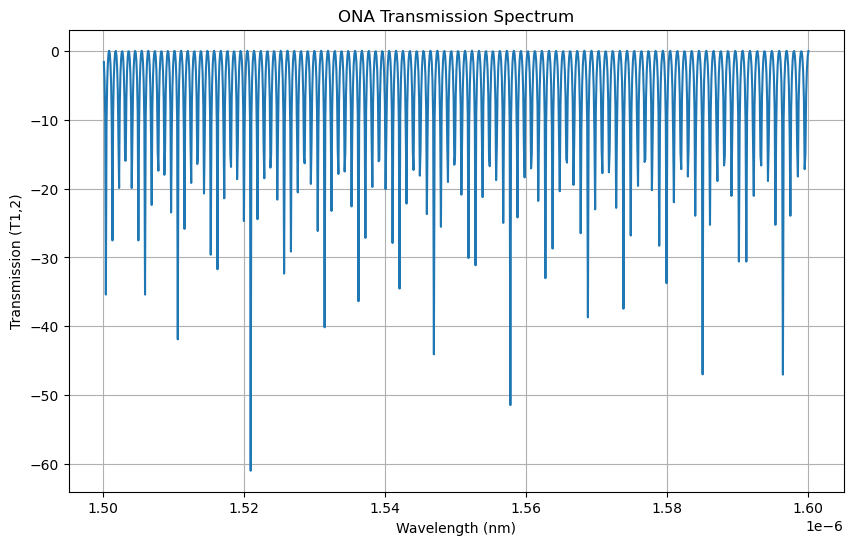

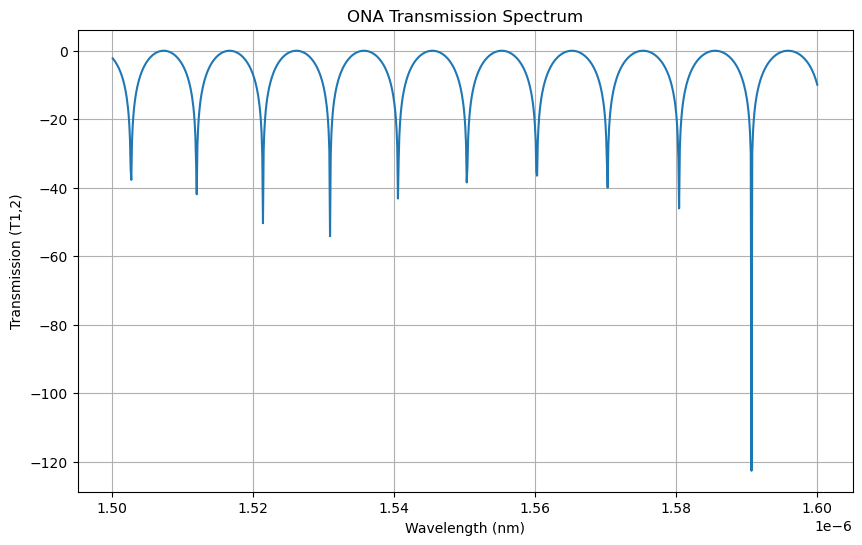

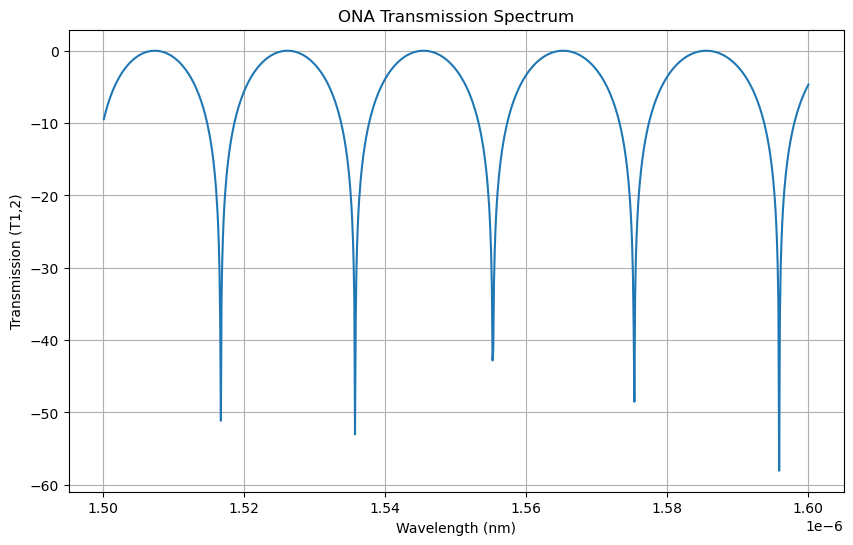

In [9]:
gain_nm = np.zeros((3, 3))

for i in range (3):
    ict_api.switchtodesign()
    ict_api.select('wvg02')
    ict_api.set('length',L+delta[i])
    ict_api.run()
    gain_1nm = (ict_api.getresult("ONA", "input 1/mode 1/gain"))
    plt.figure(figsize=(10, 6))
    plt.plot(gain_1nm['wavelength'], gain_1nm['TE gain (dB)'])
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmission (T1,2)')
    plt.title('ONA Transmission Spectrum')
    plt.grid(True)
    plt.show()
